In [1]:
import pandas as pd
import requests
import numpy as np
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer
import json
import re
import matplotlib as mpl
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r= requests.get(url)
open('Data/image-predictions.tsv', 'wb').write(r.content)

335079

In [3]:
tae = pd.read_csv('Data/twitter-archive-enhanced.csv',encoding = 'utf-8')
images = pd.read_csv('Data/image-predictions.tsv', sep = '\t', encoding = 'utf-8')

In [4]:
#copy our dataset 
tae_clean = tae.copy()
ip_clean = images.copy()

consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = tae_clean.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))        
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start) 
print(fails_dict)

In [5]:
#read tweet_json.txt
tweets = []
for line in open('Data/tweet_json.txt', 'r'):
    tweets.append(json.loads(line))
    
tae_clean['retweet_count'] = np.nan
tae_clean['favorite_count'] = np.nan

In [6]:
#copy favorite_count and retweet_count
for i,row in tae_clean.iterrows():
    for t in tweets:
        if t["id"] == row.tweet_id:
            tae_clean.set_value(i, 'retweet_count', t["retweet_count"])
            tae_clean.set_value(i, 'favorite_count', t["favorite_count"])
            break

e:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """
e:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [7]:
tae_clean.retweet_count.value_counts()

3652.0    5
1972.0    5
83.0      5
1124.0    4
748.0     4
577.0     4
179.0     4
183.0     4
2243.0    4
1207.0    4
336.0     4
115.0     4
516.0     4
71.0      4
819.0     4
542.0     4
146.0     4
61.0      4
265.0     4
135.0     3
403.0     3
619.0     3
431.0     3
242.0     3
482.0     3
1116.0    3
261.0     3
3917.0    3
306.0     3
3732.0    3
         ..
1530.0    1
995.0     1
1979.0    1
993.0     1
869.0     1
5457.0    1
1375.0    1
1493.0    1
1999.0    1
451.0     1
883.0     1
1413.0    1
1172.0    1
5616.0    1
669.0     1
1262.0    1
713.0     1
499.0     1
1620.0    1
463.0     1
3745.0    1
4610.0    1
2669.0    1
3303.0    1
658.0     1
291.0     1
7641.0    1
8549.0    1
2554.0    1
4.0       1
Name: retweet_count, Length: 1724, dtype: int64

In [8]:
images

tweet_id                                            jpg_url  \
0     666020888022790149    https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928    https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449    https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704    https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465    https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5     666050758794694657    https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
6     666051853826850816    https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
7     666055525042405380    https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
8     666057090499244032    https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
9     666058600524156928    https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   
10    666063827256086533    https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg   
11    666071193221509120    https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg   
12    666073100786774016    https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg   
13    666082916733198337    https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg   
14    666094000022159362    https://pbs.twimg.com/media/CT5w9gUW4AAsBNN.jpg   
15    666099513787052032    https://pbs.twimg.com/media/CT51-JJUEAA6hV8.jpg   
16    666102155909144576    https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg   
17    666104133288665088    https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg   
18    666268910803644416    https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg   
19    666273097616637952    https://pbs.twimg.com/media/CT8T1mtUwAA3aqm.jpg   
20    666287406224695296    https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg   
21    666293911632134144    https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg   
22    666337882303524864    https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg   
23    666345417576210432    https://pbs.twimg.com/media/CT9Vn7PWoAA_ZCM.jpg   
24    666353288456101888    https://pbs.twimg.com/media/CT9cx0tUEAAhNN_.jpg   
25    666362758909284353    https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg   
26    666373753744588802    https://pbs.twimg.com/media/CT9vZEYWUAAlZ05.jpg   
27    666396247373291520    https://pbs.twimg.com/media/CT-D2ZHWIAA3gK1.jpg   
28    666407126856765440    https://pbs.twimg.com/media/CT-NvwmW4AAugGZ.jpg   
29    666411507551481857    https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg   
...                  ...                                                ...   
2045  886366144734445568    https://pbs.twimg.com/media/DE0BTnQUwAApKEH.jpg   
2046  886680336477933568    https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg   
2047  886736880519319552    https://pbs.twimg.com/media/DE5Se8FXcAAJFx4.jpg   
2048  886983233522544640    https://pbs.twimg.com/media/DE8yicJW0AAAvBJ.jpg   
2049  887101392804085760    https://pbs.twimg.com/media/DE-eAq6UwAA-jaE.jpg   
2050  887343217045368832  https://pbs.twimg.com/ext_tw_video_thumb/88734...   
2051  887473957103951883    https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg   
2052  887517139158093824  https://pbs.twimg.com/ext_tw_video_thumb/88751...   
2053  887705289381826560    https://pbs.twimg.com/media/DFHDQBbXgAEqY7t.jpg   
2054  888078434458587136    https://pbs.twimg.com/media/DFMWn56WsAAkA7B.jpg   
2055  888202515573088257    https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg   
2056  888554962724278272    https://pbs.twimg.com/media/DFTH_O-UQAACu20.jpg   
2057  888804989199671297    https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg   
2058  888917238123831296    https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg   
2059  889278841981685760  https://pbs.twimg.com/ext_tw_video_thumb/88927...   
2060  889531135344209921    https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg   
2061  889638837579907072    https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg   
2062  889665388333682689    https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg   
2063  889880896479866881    https://pbs.twimg.com/media/DFl99B1WsA

In [9]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


# Assess
https://stackoverflow.com/questions/26763344/convert-pandas-column-to-datetime

In [10]:
tae.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [11]:
tae.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [12]:
tae.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
tae.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [14]:
tae.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [15]:
tae.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [16]:
tae.name.value_counts()

None            745
a                55
Charlie          12
Cooper           11
Lucy             11
Oliver           11
Lola             10
Tucker           10
Penny            10
Bo                9
Winston           9
the               8
Sadie             8
Buddy             7
Toby              7
Daisy             7
an                7
Bailey            7
Rusty             6
Oscar             6
Koda              6
Dave              6
Scout             6
Jack              6
Milo              6
Leo               6
Bella             6
Jax               6
Stanley           6
very              5
               ... 
Butters           1
Fiji              1
Brandy            1
Cermet            1
Glenn             1
Rilo              1
Jackie            1
Enchilada         1
Wesley            1
Gustav            1
Perry             1
Chaz              1
Lucia             1
Leonidas          1
Cleopatricia      1
Mya               1
Dale              1
Cal               1
Pumpkin           1


### Quality

In [17]:
tae[(tae.name.str.islower())].name.value_counts()

a               55
the              8
an               7
very             5
quite            4
just             4
one              4
getting          2
mad              2
not              2
actually         2
officially       1
all              1
infuriating      1
this             1
old              1
light            1
life             1
his              1
unacceptable     1
by               1
such             1
my               1
space            1
incredibly       1
Name: name, dtype: int64

In [18]:
pd.set_option('display.max_colwidth', -1)
tae[(tae.text.str.find('named') > 0)].text

603     RT @dog_rates: This a Norwegian Pewterschmidt named Tickles. Ears for days. 12/10 I care deeply for Tickles https://t.co/0aDF62KVP7         
1853    This is a Sizzlin Menorah spaniel from Brooklyn named Wylie. Lovable eyes. Chiller as hell. 10/10 and I'm out.. poof https://t.co/7E0AiJXPmI
1955    This is a Lofted Aphrodisiac Terrier named Kip. Big fan of bed n breakfasts. Fits perfectly. 10/10 would pet firmly https://t.co/gKlLpNzIl3 
2034    This is a Tuscaloosa Alcatraz named Jacob (Yacōb). Loves to sit in swing. Stellar tongue. 11/10 look at his feet https://t.co/2IslQ8ZSc7    
2066    This is a Helvetica Listerine named Rufus. This time Rufus will be ready for the UPS guy. He'll never expect it 9/10 https://t.co/34OhVhMkVr
2116    This is a Deciduous Trimester mix named Spork. Only 1 ear works. No seat belt. Incredibly reckless. 9/10 still cute https://t.co/CtuJoLHiDo 
2125    This is a Rich Mahogany Seltzer named Cherokee. Just got destroyed by a snowball. Isn't very happy

##### twitter_archive_enhanced

- Some numerators are missing
- We need a "like" value for analysis instead of numerator and denominator  
- Source column should be cleaned and converted to category
- Dog names have errors a, officially ...  
- There are missing dog names  
- There are retweets  
- Breed types should a be category  
- tweet_id , in_reply_to_status_id,in_reply_to_user_id columns should be in string format  
- timestamp and retweeted_status_timestamp columns should be in date format
- Merged image prediction column names are not understandable
- Column names start with lower letters
- Dog Stages have duplicated values
- Dog Stages have missing values
- Dog Stage values contain "None" which should be NULL

##### image-preddictions

- Some predictions in the same pictures have close probability. If 1 p_dog == false and 2nd and 3rd prediction probability is close and their p_dog == true they can be considered more precise. 

### Tidiness

- Dog stages should be 1 column   
- All data should be in 1 table  
- Some columns can be removed like retweet columns  


# Clean

## Issue

Column names start with lower letters

## Define

Capitalize column names with title function


In [19]:
tae_clean.columns = tae_clean.columns.str.title()

## Test

In [20]:
tae_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 19 columns):
Tweet_Id                      2356 non-null int64
In_Reply_To_Status_Id         78 non-null float64
In_Reply_To_User_Id           78 non-null float64
Timestamp                     2356 non-null object
Source                        2356 non-null object
Text                          2356 non-null object
Retweeted_Status_Id           181 non-null float64
Retweeted_Status_User_Id      181 non-null float64
Retweeted_Status_Timestamp    181 non-null object
Expanded_Urls                 2297 non-null object
Rating_Numerator              2356 non-null int64
Rating_Denominator            2356 non-null int64
Name                          2356 non-null object
Doggo                         2356 non-null object
Floofer                       2356 non-null object
Pupper                        2356 non-null object
Puppo                         2356 non-null object
Retweet_Count                 23

## Issue

Second and Third predictions for some pictures have close probability with first prediction and p1_dog is False

## Define

if p1_dog == false and p1_conf is close to p2_conf or p3_conf, in case p2_dog or p3_dog == true they will be copied as p1. 

In [21]:
# This loop iterates through all rows of image predictions file. If p1_dog is FALSE and if 
# p2_dog or p3_dog is TRUE and confidance levels are high, p2 or p3 will be chosen instead of p1.
for i,row in ip_clean.iterrows():
    if not row.p1_dog:
        if row.p2_dog and row.p2_conf*2 > row.p1_conf:
            ip_clean.p1_dog[i] = 'TRUE'
            ip_clean.p1_conf[i] = row.p2_conf
        elif row.p3_dog and row.p3_conf*2 > row.p1_conf:
            ip_clean.p1_dog[i] = 'TRUE'
            ip_clean.p1_conf[i] = row.p3_conf

e:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
e:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
e:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
e:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

## Test

In [22]:
ip_clean

tweet_id  \
0     666020888022790149   
1     666029285002620928   
2     666033412701032449   
3     666044226329800704   
4     666049248165822465   
5     666050758794694657   
6     666051853826850816   
7     666055525042405380   
8     666057090499244032   
9     666058600524156928   
10    666063827256086533   
11    666071193221509120   
12    666073100786774016   
13    666082916733198337   
14    666094000022159362   
15    666099513787052032   
16    666102155909144576   
17    666104133288665088   
18    666268910803644416   
19    666273097616637952   
20    666287406224695296   
21    666293911632134144   
22    666337882303524864   
23    666345417576210432   
24    666353288456101888   
25    666362758909284353   
26    666373753744588802   
27    666396247373291520   
28    666407126856765440   
29    666411507551481857   
...                  ...   
2045  886366144734445568   
2046  886680336477933568   
2047  886736880519319552   
2048  886983233522544640   
2049  887101392804085760   
2050  887343217045368832   
2051  887473957103951883   
2052  887517139158093824   
2053  887705289381826560   
2054  888078434458587136   
2055  888202515573088257   
2056  888554962724278272   
2057  888804989199671297   
2058  888917238123831296   
2059  889278841981685760   
2060  889531135344209921   
2061  889638837579907072   
2062  889665388333682689   
2063  889880896479866881   
2064  890006608113172480   
2065  890240255349198849   
2066  890609185150312448   
2067  890729181411237888   
2068  890971913173991426   
2069  891087950875897856   
2070  891327558926688256   
2071  891689557279858688   
2072  891815181378084864   
2073  892177421306343426   
2074  892420643555336193   

                                                                                      jpg_url  \
0     https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg                                           
1     https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg                                           
2     https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg                                           
3     https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg                                           
4     https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg                                           
5     https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg                                           
6     https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg                                           
7     https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg                                           
8     https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg                                           
9     https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg                                           
10    https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg                                           
11    https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg                                           
12    https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg                                           
13    https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg                                           
14    https://pbs.twimg.com/media/CT5w9gUW4AAsBNN.jpg                                           
15    https://pbs.twimg.com/media/CT51-JJUEAA6hV8.jpg                                           
16    https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg                                           
17    https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg                                           
18    https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg                                           
19    https://pbs.twimg.com/media/CT8T1mtUwAA3aqm.jpg                                           
20    https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg                                           
21    https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg                                           
22    https://pbs.twimg.com/media/CT9OwFIWEAMuRj

## Issue

Retweets and columns of retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp have to be removed.

## Define

Delete tweets of retweeted_status_id is not null. Drop columns retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp

In [23]:
#Delete rows and columns related to retweets
tae_clean = tae_clean[tae_clean.Retweeted_Status_Id.isnull()]
tae_clean = tae_clean.drop(['Retweeted_Status_Id','Retweeted_Status_User_Id','Retweeted_Status_Timestamp'],axis=1)

## Test

In [24]:
tae_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 16 columns):
Tweet_Id                 2175 non-null int64
In_Reply_To_Status_Id    78 non-null float64
In_Reply_To_User_Id      78 non-null float64
Timestamp                2175 non-null object
Source                   2175 non-null object
Text                     2175 non-null object
Expanded_Urls            2117 non-null object
Rating_Numerator         2175 non-null int64
Rating_Denominator       2175 non-null int64
Name                     2175 non-null object
Doggo                    2175 non-null object
Floofer                  2175 non-null object
Pupper                   2175 non-null object
Puppo                    2175 non-null object
Retweet_Count            2175 non-null float64
Favorite_Count           2175 non-null float64
dtypes: float64(4), int64(3), object(9)
memory usage: 288.9+ KB


## Issue

Source column should be cleaned and convert to category.

# Define

Clean source colummn text with str.extract and change to category with astype

In [25]:
#Clean the source column text
for i,row in tae_clean.iterrows():
    tae_clean.Source[i] = row.Source.split(">")[1].split("<")[0]

#Change datatype of source column to category
tae_clean.Source = tae_clean.Source.astype("category")

e:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## Test

In [26]:
tae_clean.Source

0       Twitter for iPhone
1       Twitter for iPhone
2       Twitter for iPhone
3       Twitter for iPhone
4       Twitter for iPhone
5       Twitter for iPhone
6       Twitter for iPhone
7       Twitter for iPhone
8       Twitter for iPhone
9       Twitter for iPhone
10      Twitter for iPhone
11      Twitter for iPhone
12      Twitter for iPhone
13      Twitter for iPhone
14      Twitter for iPhone
15      Twitter for iPhone
16      Twitter for iPhone
17      Twitter for iPhone
18      Twitter for iPhone
20      Twitter for iPhone
21      Twitter for iPhone
22      Twitter for iPhone
23      Twitter for iPhone
24      Twitter for iPhone
25      Twitter for iPhone
26      Twitter for iPhone
27      Twitter for iPhone
28      Twitter for iPhone
29      Twitter for iPhone
30      Twitter for iPhone
               ...        
2326    Twitter for iPhone
2327    Twitter for iPhone
2328    Twitter for iPhone
2329    Twitter for iPhone
2330    Twitter for iPhone
2331    Twitter for iPhone
2

## Issue

Dog Stages have missing values. Some dogs have more than one stage column filled. None values should be NULL

## Define

Convert all stage values to Null and extract all values again from text. Remove entries inlude more than one stage. 

In [27]:
# All dog stage information is converted to NULL
tae_clean.Doggo = np.nan
tae_clean.Pupper = np.nan
tae_clean.Puppo = np.nan
tae_clean.Floofer = np.nan

# Extract dog stage information and check if a text contains more than one stage
for i,row in tae_clean.iterrows():
    a=0
    if re.findall(r"([a-zA-Z]oggo)",tae_clean.Text[i]):
        tae_clean.Doggo[i]= "Doggo"
        a +=1 
    if re.findall(r"([a-zA-Z]upper)",tae_clean.Text[i]):
        tae_clean.Pupper[i]= "Pupper"
        a +=1   
    if re.findall(r"([a-zA-Z]uppo)",tae_clean.Text[i]):
        tae_clean.Puppo[i]= "Puppo"
        a +=1 
    if re.findall(r"([a-zA-Z]loofer)",tae_clean.Text[i]):
        tae_clean.Floofer[i]= "Floofer"
        a +=1
    if a>1:
        tae_clean.Doggo[i]= np.nan
        tae_clean.Pupper[i]= np.nan
        tae_clean.Puppo[i]= np.nan
        tae_clean.Floofer[i]= np.nan

e:\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
e:\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
e:\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
e:\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 

## Test

In [28]:
tae_clean


Tweet_Id  In_Reply_To_Status_Id  In_Reply_To_User_Id  \
0     892420643555336193 NaN                    NaN                    
1     892177421306343426 NaN                    NaN                    
2     891815181378084864 NaN                    NaN                    
3     891689557279858688 NaN                    NaN                    
4     891327558926688256 NaN                    NaN                    
5     891087950875897856 NaN                    NaN                    
6     890971913173991426 NaN                    NaN                    
7     890729181411237888 NaN                    NaN                    
8     890609185150312448 NaN                    NaN                    
9     890240255349198849 NaN                    NaN                    
10    890006608113172480 NaN                    NaN                    
11    889880896479866881 NaN                    NaN                    
12    889665388333682689 NaN                    NaN                    
13    889638837579907072 NaN                    NaN                    
14    889531135344209921 NaN                    NaN                    
15    889278841981685760 NaN                    NaN                    
16    888917238123831296 NaN                    NaN                    
17    888804989199671297 NaN                    NaN                    
18    888554962724278272 NaN                    NaN                    
20    888078434458587136 NaN                    NaN                    
21    887705289381826560 NaN                    NaN                    
22    887517139158093824 NaN                    NaN                    
23    887473957103951883 NaN                    NaN                    
24    887343217045368832 NaN                    NaN                    
25    887101392804085760 NaN                    NaN                    
26    886983233522544640 NaN                    NaN                    
27    886736880519319552 NaN                    NaN                    
28    886680336477933568 NaN                    NaN                    
29    886366144734445568 NaN                    NaN                    
30    886267009285017600  8.862664e+17           2.281182e+09          
...                  ...           ...                    ...          
2326  666411507551481857 NaN                    NaN                    
2327  666407126856765440 NaN                    NaN                    
2328  666396247373291520 NaN                    NaN                    
2329  666373753744588802 NaN                    NaN                    
2330  666362758909284353 NaN                    NaN                    
2331  666353288456101888 NaN                    NaN                    
2332  666345417576210432 NaN                    NaN                    
2333  666337882303524864 NaN                    NaN                    
2334  666293911632134144 NaN                    NaN                    
2335  666287406224695296 NaN                    NaN                    
2336  666273097616637952 NaN                    NaN                    
2337  666268910803644416 NaN                    NaN                    
2338  666104133288665088 NaN                    NaN                    
2339  666102155909144576 NaN                    NaN                    
2340  666099513787052032 NaN                    NaN                    
2341  666094000022159362 NaN                    NaN                    
2342  666082916733198337 NaN                    NaN                    
2343  666073100786774016 NaN                    NaN                    
2344  666071193221509120 NaN                    NaN                    
2345  666063827256086533 NaN                    NaN                    
2346  666058600524156928 NaN                    NaN                    
2347  666057090499244032 NaN                    NaN                    
2348  666055525042405380 NaN                    NaN                    
2349  666051853826850816 NaN                    NaN     

## Issue

Missing and Wrong dog names

## Define

All dog names starts with capital letter. I ll fix both situations with optimizing gathering regex and extracting
names again.

Name phrases are : "This is NAME"  "named NAME"  "hello to NAME"  "Meet NAME"  "name is NAME"  


In [29]:
# Extract dog names from Text column
for i,row in tae_clean.iterrows():
    if re.findall(r"This is\s([A-Z][a-z]+)",tae_clean.Text[i]):
        name = re.findall(r"This is\s([A-Z][a-z]+)",tae_clean.Text[i])
        tae_clean.Name[i]=name[0]
    elif re.findall(r"named\s([A-Z][a-z]+)",tae_clean.Text[i]):
        name = re.findall(r"named\s([A-Z][a-z]+)",tae_clean.Text[i])
        tae_clean.Name[i]=name[0]
    elif re.findall(r"hello to\s([A-Z][a-z]+)",tae_clean.Text[i]):
        name = re.findall(r"hello to\s([A-Z][a-z]+)",tae_clean.Text[i])
        tae_clean.Name[i]=name[0]    
    elif re.findall(r"name is\s([A-Z][a-z]+)",tae_clean.Text[i]):
        name = re.findall(r"name is\s([A-Z][a-z]+)",tae_clean.Text[i])
        tae_clean.Name[i]=name[0]   
    elif re.findall(r"Meet\s([A-Z][a-z]+)",tae_clean.Text[i]):
        name = re.findall(r"Meet\s([A-Z][a-z]+)",tae_clean.Text[i])
        tae_clean.Name[i]=name[0]
    else:
        tae_clean.Name[i] = np.NaN

e:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
e:\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
e:\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
e:\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentat

## Test

In [30]:
tae_clean.Name.value_counts()

Lucy        11
Charlie     11
Cooper      10
Oliver      10
Penny       9 
Tucker      9 
Sadie       8 
Winston     8 
Lola        8 
Toby        7 
Daisy       7 
Jax         6 
Bo          6 
Stanley     6 
Oscar       6 
Bailey      6 
Bella       6 
Koda        6 
Louis       5 
Rusty       5 
Buddy       5 
Leo         5 
Zoey        5 
Bentley     5 
Scout       5 
Chester     5 
Milo        5 
Gus         4 
Winnie      4 
Oakley      4 
           .. 
Rilo        1 
Miguel      1 
Reagan      1 
Bobbay      1 
Kanu        1 
Leonidas    1 
Lucia       1 
Chaz        1 
Tedrick     1 
Monster     1 
Angel       1 
Gidget      1 
Stormy      1 
Bobby       1 
Pluto       1 
Kenzie      1 
Bones       1 
Cedrick     1 
Jim         1 
Kuyu        1 
Shelby      1 
Newt        1 
Skye        1 
Florence    1 
Rudy        1 
Spanky      1 
Klint       1 
Gustav      1 
Perry       1 
Jarod       1 
Name: Name, Length: 951, dtype: int64

## Issue

Some numerators are missing. We need a "like" value instead of numerator and denominator

## Define

Some numerators contain . in values. Will find them with re.findall command. Then find numerator/denumerator value and store it as Point. Finally remove denumerator column.

In [31]:
# Rename Rating Numerator column to Point and change type to float.
tae_clean.rename(columns = {"Rating_Numerator" : "Point"},inplace = True)
tae_clean.Point = tae_clean.Point.astype(float)
#tae_clean=tae_clean.drop(['Rating_Denominator'],axis = 1)

# Extract all numerators and denominators from text column and calculate point column
for i,row in tae_clean.iterrows():
    numerator = re.findall(r"(\d?\d?\d?\d\.?\d?\d?\d?)/\d",tae_clean.Text[i])
    denumerator = re.findall(r"\d/([1-9]\d*)",tae_clean.Text[i])
    tae_clean.Point[i] = float(numerator[0])/float(denumerator[0])

# Round value of point
tae_clean.Point = round(tae_clean.Point,1)

# Drop Denominator Column
tae_clean = tae_clean.drop(['Rating_Denominator'],axis=1)

e:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


## Test

In [32]:
tae_clean.Point.value_counts()

1.2      505
1.0      446
1.1      433
1.3      307
0.9      156
0.8      99 
0.7      54 
1.4      44 
0.5      35 
0.6      33 
0.3      19 
0.4      15 
0.2      11 
0.1      7  
0.0      2  
42.0     2  
1.5      1  
96.0     1  
18.2     1  
66.6     1  
177.6    1  
1.7      1  
3.4      1  
Name: Point, dtype: int64

## Issue

Tweet_Id, In_Reply_To_Status_Id, In_Reply_To_User_Id colums are not in string format

## Define

Change format of Tweet_Id, In_Reply_To_Status_Id, In_Reply_To_User_Id columns to string with astype function

In [33]:
tae_clean.Tweet_Id = tae_clean.Tweet_Id.astype("str")
ip_clean.tweet_id =  ip_clean.tweet_id.astype("str")
tae_clean.In_Reply_To_Status_Id = tae_clean.In_Reply_To_Status_Id.astype("str")
tae_clean.In_Reply_To_User_Id = tae_clean.In_Reply_To_User_Id.astype("str")

## Test

In [34]:
type(tae_clean['Tweet_Id'][1])

str

## Issue

Timestamp column should be time type

## Define

pandas to_datetime function can be used to convert type

In [35]:
tae_clean['Timestamp'] = pd.to_datetime(tae_clean['Timestamp'])

# Test

In [36]:
tae_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 15 columns):
Tweet_Id                 2175 non-null object
In_Reply_To_Status_Id    2175 non-null object
In_Reply_To_User_Id      2175 non-null object
Timestamp                2175 non-null datetime64[ns]
Source                   2175 non-null category
Text                     2175 non-null object
Expanded_Urls            2117 non-null object
Point                    2175 non-null float64
Name                     1416 non-null object
Doggo                    80 non-null object
Floofer                  9 non-null object
Pupper                   247 non-null object
Puppo                    40 non-null object
Retweet_Count            2175 non-null float64
Favorite_Count           2175 non-null float64
dtypes: category(1), datetime64[ns](1), float64(3), object(10)
memory usage: 337.2+ KB


# Tidyness

## Issue

Merge image predictions with twitter archive

## Define

merge image predictions p1_conf,p1,p1_dog to twitter archive file with pd.merge command 

In [37]:
# Capitalize ip dataframe colums for match
ip_clean.columns = ip_clean.columns.str.title()

# merge image predictions with tae_clean dataframe on Tweet_Id
tae_clean = pd.merge(tae_clean,ip_clean[['P1','P1_Conf','P1_Dog','Tweet_Id']],on = 'Tweet_Id')

## Test

In [38]:
tae_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 18 columns):
Tweet_Id                 1994 non-null object
In_Reply_To_Status_Id    1994 non-null object
In_Reply_To_User_Id      1994 non-null object
Timestamp                1994 non-null datetime64[ns]
Source                   1994 non-null category
Text                     1994 non-null object
Expanded_Urls            1994 non-null object
Point                    1994 non-null float64
Name                     1373 non-null object
Doggo                    67 non-null object
Floofer                  7 non-null object
Pupper                   226 non-null object
Puppo                    36 non-null object
Retweet_Count            1994 non-null float64
Favorite_Count           1994 non-null float64
P1                       1994 non-null object
P1_Conf                  1994 non-null float64
P1_Dog                   1994 non-null bool
dtypes: bool(1), category(1), datetime64[ns](1), float64(4), 

## Issue

merged image prediction column names are not understandable

## Define

change desired column names with the rename function

In [39]:
tae_clean.rename(columns = {'P1' : 'Breed','P1_Conf': 'Breed_Confidence','P1_Dog' : 'isDog'}, inplace = True)
tae_clean.Breed = tae_clean.Breed.str.replace('_', " ")
tae_clean.Breed = tae_clean.Breed.str.title()

## Test

In [40]:
tae_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 18 columns):
Tweet_Id                 1994 non-null object
In_Reply_To_Status_Id    1994 non-null object
In_Reply_To_User_Id      1994 non-null object
Timestamp                1994 non-null datetime64[ns]
Source                   1994 non-null category
Text                     1994 non-null object
Expanded_Urls            1994 non-null object
Point                    1994 non-null float64
Name                     1373 non-null object
Doggo                    67 non-null object
Floofer                  7 non-null object
Pupper                   226 non-null object
Puppo                    36 non-null object
Retweet_Count            1994 non-null float64
Favorite_Count           1994 non-null float64
Breed                    1994 non-null object
Breed_Confidence         1994 non-null float64
isDog                    1994 non-null bool
dtypes: bool(1), category(1), datetime64[ns](1), float64(4), 

## Issue

Dog stages should be one column   

## Define

with pd.melt function convert different stage columns into one. Remove duplicated values.

In [41]:
df1 = pd.melt(tae_clean,id_vars = ['Tweet_Id', 'In_Reply_To_Status_Id', 'In_Reply_To_User_Id', 'Timestamp',
       'Source', 'Text', 'Expanded_Urls','Point', 'Name','Retweet_Count','Favorite_Count', 'Breed', 'Breed_Confidence', 'isDog'],var_name="Var", value_name="Stage")
df1=df1.drop(['Var'],axis = 1)


In [42]:
df1 = df1.sort_values(by=['Stage'])
df1 = df1[df1['Text'].duplicated() == False]
df1.Stage.value_counts()


Pupper     226
Doggo      67 
Puppo      36 
Floofer    7  
Name: Stage, dtype: int64

In [43]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 9 to 1993
Data columns (total 15 columns):
Tweet_Id                 1994 non-null object
In_Reply_To_Status_Id    1994 non-null object
In_Reply_To_User_Id      1994 non-null object
Timestamp                1994 non-null datetime64[ns]
Source                   1994 non-null category
Text                     1994 non-null object
Expanded_Urls            1994 non-null object
Point                    1994 non-null float64
Name                     1373 non-null object
Retweet_Count            1994 non-null float64
Favorite_Count           1994 non-null float64
Breed                    1994 non-null object
Breed_Confidence         1994 non-null float64
isDog                    1994 non-null bool
Stage                    336 non-null object
dtypes: bool(1), category(1), datetime64[ns](1), float64(4), object(8)
memory usage: 222.2+ KB


In [44]:
 df1['Name_Lenght']=df1.Name.str.len()

In [45]:
df1[df1.isDog == True].Breed.value_counts()

Golden Retriever               139
Labrador Retriever             95 
Pembroke                       88 
Chihuahua                      79 
Pug                            54 
Chow                           41 
Samoyed                        40 
Pomeranian                     38 
Toy Poodle                     38 
Malamute                       29 
Cocker Spaniel                 27 
French Bulldog                 26 
Chesapeake Bay Retriever       23 
Miniature Pinscher             22 
Siberian Husky                 20 
German Shepherd                20 
Staffordshire Bullterrier      19 
Shetland Sheepdog              18 
Eskimo Dog                     18 
Maltese Dog                    18 
Rottweiler                     17 
Cardigan                       17 
Beagle                         17 
Shih-Tzu                       17 
Kuvasz                         16 
Lakeland Terrier               16 
Italian Greyhound              16 
Great Pyrenees                 14 
West Highland White 

In [46]:
plt.rcParams["font.size"] = 30
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.titlesize'] = 20
plt.rcParams["axes.titlesize"] = 20
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 10

In [47]:
df1_corr = df1.corr()
df1_corr

Point  Retweet_Count  Favorite_Count  Breed_Confidence  \
Point             1.000000  0.017933       0.015613       -0.007908           
Retweet_Count     0.017933  1.000000       0.912947        0.053005           
Favorite_Count    0.015613  0.912947       1.000000        0.078735           
Breed_Confidence -0.007908  0.053005       0.078735        1.000000           
isDog            -0.033318  0.012239       0.058428        0.038334           
Name_Lenght       0.025368 -0.043502      -0.060833        0.008345           

                     isDog  Name_Lenght  
Point            -0.033318  0.025368     
Retweet_Count     0.012239 -0.043502     
Favorite_Count    0.058428 -0.060833     
Breed_Confidence  0.038334  0.008345     
isDog             1.000000  0.007591     
Name_Lenght       0.007591  1.000000

In [48]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 9 to 1993
Data columns (total 16 columns):
Tweet_Id                 1994 non-null object
In_Reply_To_Status_Id    1994 non-null object
In_Reply_To_User_Id      1994 non-null object
Timestamp                1994 non-null datetime64[ns]
Source                   1994 non-null category
Text                     1994 non-null object
Expanded_Urls            1994 non-null object
Point                    1994 non-null float64
Name                     1373 non-null object
Retweet_Count            1994 non-null float64
Favorite_Count           1994 non-null float64
Breed                    1994 non-null object
Breed_Confidence         1994 non-null float64
isDog                    1994 non-null bool
Stage                    336 non-null object
Name_Lenght              1373 non-null float64
dtypes: bool(1), category(1), datetime64[ns](1), float64(5), object(8)
memory usage: 237.8+ KB


In [49]:
df2= df1[df1['Point']<1.5 ]
df2= df2[df2['Point']>0.1 ]

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1985 entries, 9 to 1993
Data columns (total 16 columns):
Tweet_Id                 1985 non-null object
In_Reply_To_Status_Id    1985 non-null object
In_Reply_To_User_Id      1985 non-null object
Timestamp                1985 non-null datetime64[ns]
Source                   1985 non-null category
Text                     1985 non-null object
Expanded_Urls            1985 non-null object
Point                    1985 non-null float64
Name                     1371 non-null object
Retweet_Count            1985 non-null float64
Favorite_Count           1985 non-null float64
Breed                    1985 non-null object
Breed_Confidence         1985 non-null float64
isDog                    1985 non-null bool
Stage                    336 non-null object
Name_Lenght              1371 non-null float64
dtypes: bool(1), category(1), datetime64[ns](1), float64(5), object(8)
memory usage: 236.7+ KB


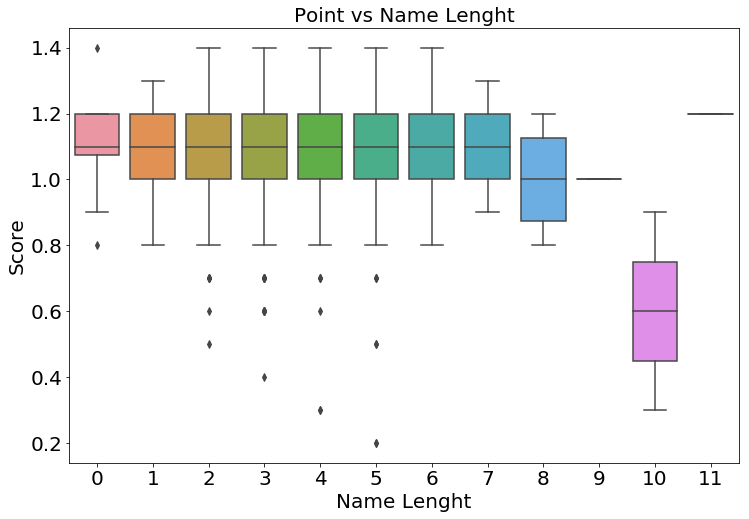

In [50]:
fig, ax = plt.subplots()
sns.boxplot(x="Name_Lenght", y="Point", data=df2[df2.isDog == True])
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.xlabel('Name Lenght')
plt.ylabel('Score')
plt.title('Point vs Name Lenght');

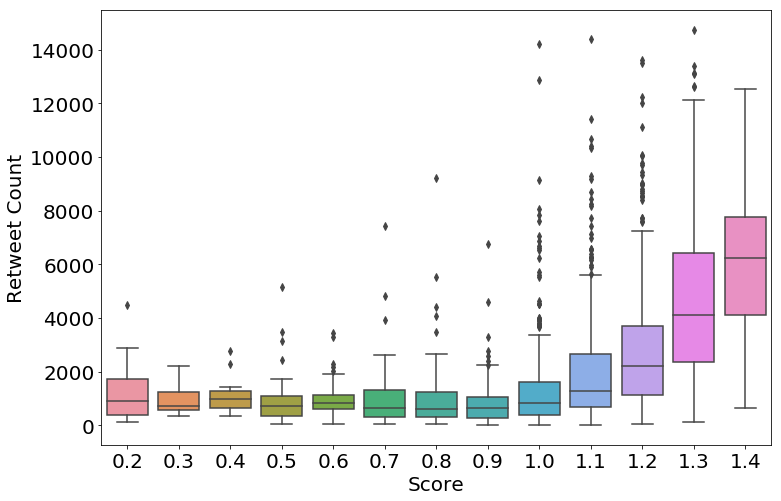

In [51]:
sns.boxplot(x="Point", y="Retweet_Count", data=df2[df2['Retweet_Count'] < 15000])
plt.ylabel('Retweet Count')
plt.xlabel('Score');

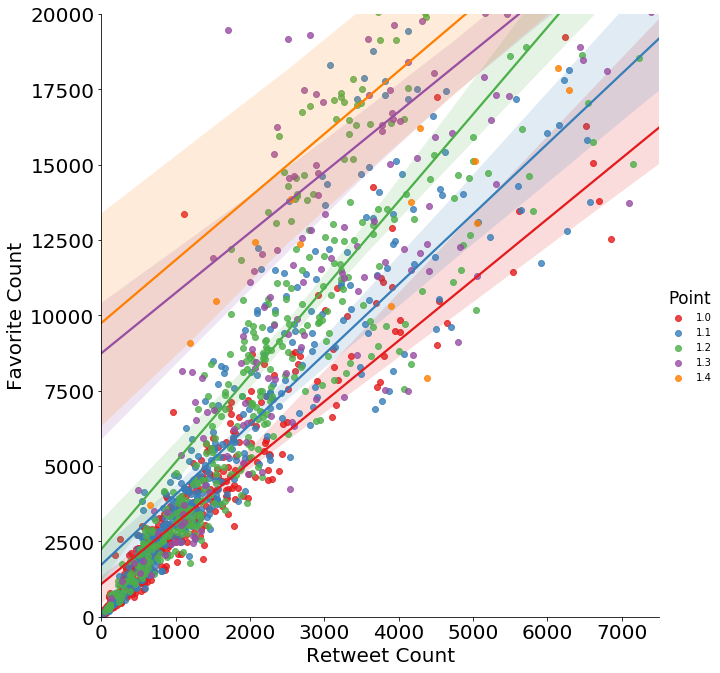

In [52]:
fig = sns.lmplot(x="Retweet_Count", y="Favorite_Count",
                hue="Point", 
                palette="Set1",
                data=df2[df2.Point > 0.9],height= 10)
fig.set(xlim=(0, 7500), ylim=(0, 20000))
plt.ylabel('Favorite Count')
plt.xlabel('Retweet Count');

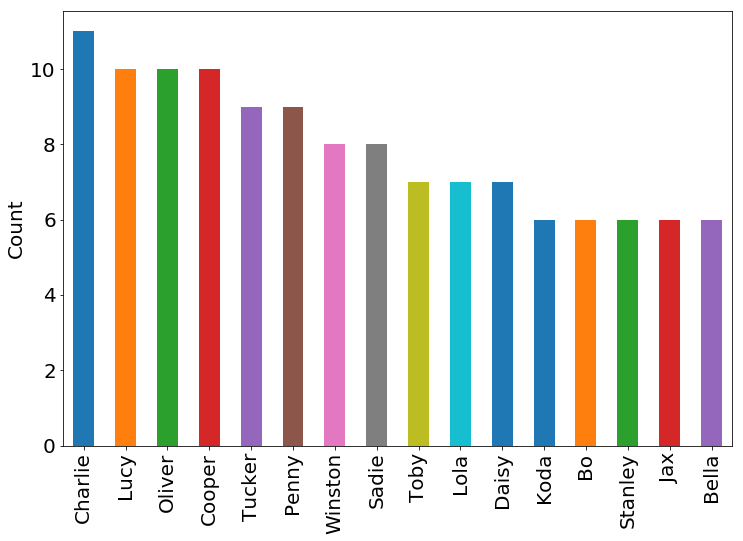

In [53]:
df2.Name.value_counts()[df2.Name.value_counts()[:]>5].plot.bar();
plt.ylabel('Count');

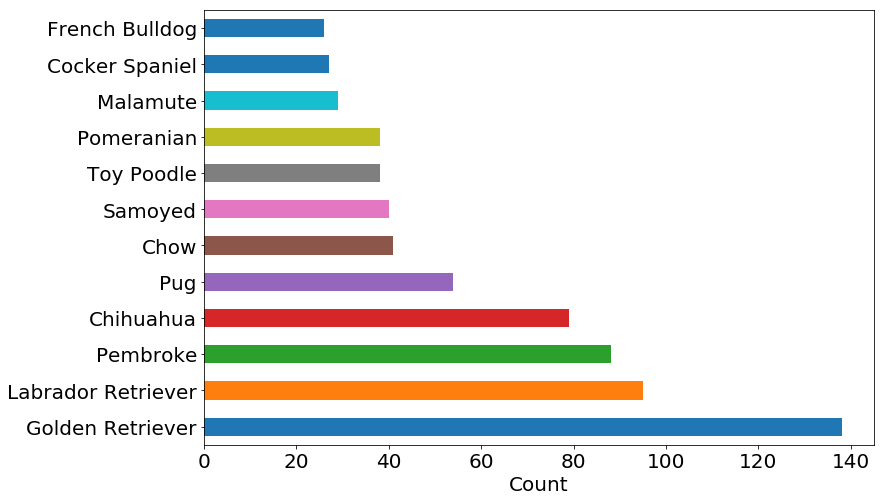

In [54]:
df2.Breed.value_counts()[df2.Breed.value_counts()[:]>25].plot.barh()
plt.xlabel('Count');

In [55]:
df2.to_csv('Data/twitter_archive_master.csv', sep=',')